In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
#SK LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from pickle import dump

In [3]:
df = pd.read_csv('kc_house_data_train.csv',index_col=0)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [5]:
#drop ID
df.drop(columns='id',inplace=True)

In [6]:
df.shape

#21 columns

(17290, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 20 columns):
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 2.8+ MB


In [7]:
# possibly figure out changing date column from string to date
# use months or days? 
#df['date']=pd.to_datetime(df['date'],yearfirst=True)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [9]:
#maybe create dummy cols for view,condition,grade? 
#do we have to scale values? - sqft living, rooms
#zipcode to evaluate median income level? schools?
#lat/longitude -> near subway or park 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f4fb810>]],
      dtype=object)

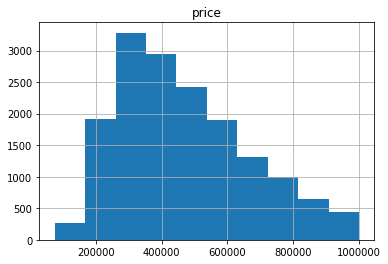

In [8]:
df=df[df['price'] <= 1000000]
#outliers 
#skews right
#cut out over 1000000 for more normal distribution
#double check this 

df.hist(column='price')

In [11]:
#grade and waterfront should be broken out - not wf but its useful
#view and condition doesn't seem to vary much
#maybe break out view into 0 or 4? -> 0 or 1

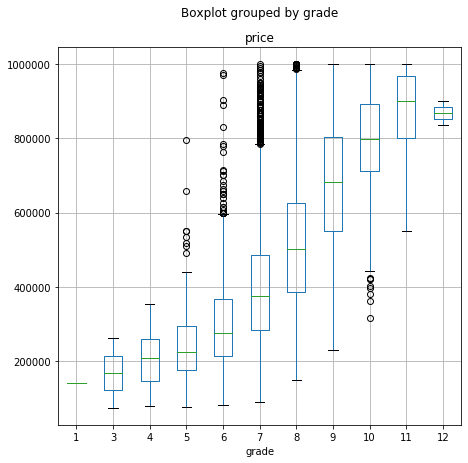

In [9]:
df.boxplot('price', by = 'grade',figsize=(7,7))

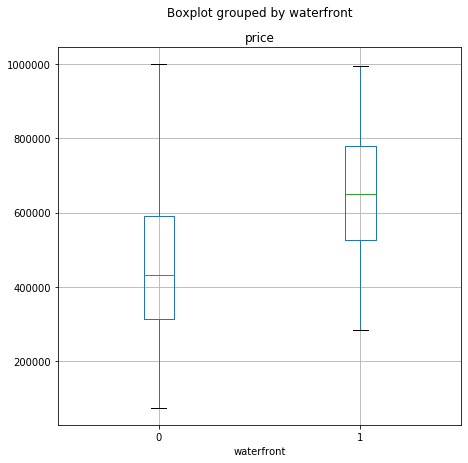

In [13]:
df.boxplot('price', by = 'waterfront',figsize=(7,7))

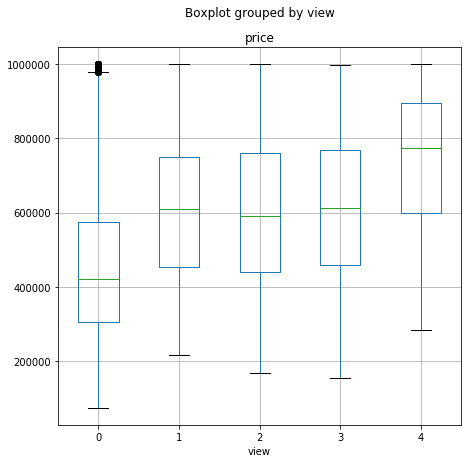

In [14]:
df.boxplot('price', by = 'view',figsize=(7,7))

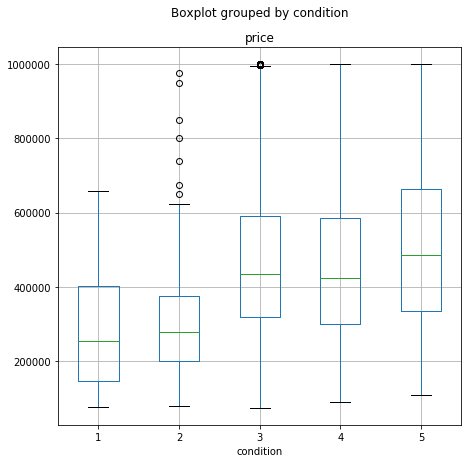

In [15]:
df.boxplot('price', by = 'condition',figsize=(7,7))

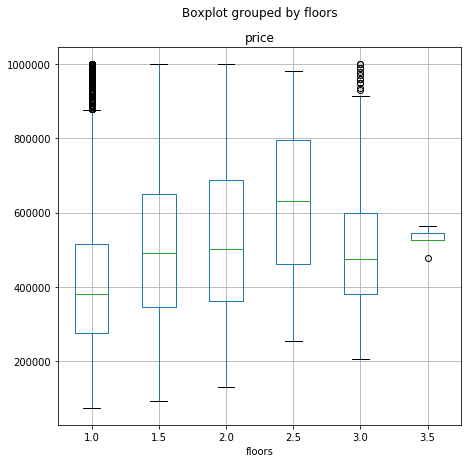

In [16]:
df.boxplot('price', by = 'floors',figsize=(7,7))
#look into

In [17]:
corr=df.corr()

In [18]:
corr



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.290422,0.443596,0.607769,0.090758,0.273637,0.052764,0.216607,0.033298,0.621512,0.520383,0.218675,0.065824,0.075452,-0.014642,0.439919,0.074778,0.551840,0.080660
bedrooms,0.290422,1.000000,0.481723,0.580288,0.022110,0.148853,-0.030194,0.033939,0.022207,0.313505,0.457961,0.277192,0.159116,-0.001380,-0.144453,-0.026084,0.134110,0.363358,0.017572
bathrooms,0.443596,0.481723,1.000000,0.713214,0.058197,0.498996,-0.004443,0.085075,-0.134723,0.605792,0.633320,0.216769,0.549594,0.022878,-0.209400,-0.017714,0.245865,0.516908,0.058980
sqft_living,0.607769,0.580288,0.713214,1.000000,0.149980,0.340827,0.005603,0.153489,-0.078797,0.694363,0.849375,0.371833,0.360597,0.016121,-0.207240,0.001499,0.282919,0.728488,0.165934
sqft_lot,0.090758,0.022110,0.058197,0.149980,1.000000,-0.016122,0.014834,0.076964,-0.007303,0.085177,0.156050,0.005358,0.041908,0.008576,-0.126401,-0.092441,0.214248,0.134817,0.682749
floors,0.273637,0.148853,0.498996,0.340827,-0.016122,1.000000,-0.002098,-0.018842,-0.274128,0.458320,0.533498,-0.302442,0.509909,-0.003784,-0.068383,0.032279,0.140578,0.270545,-0.020195
waterfront,0.052764,-0.030194,-0.004443,0.005603,0.014834,-0.002098,1.000000,0.296488,0.008927,-0.008653,-0.002569,0.014971,-0.037485,0.062463,0.046615,-0.045151,-0.061188,0.003589,0.026300
view,0.216607,0.033939,0.085075,0.153489,0.076964,-0.018842,0.296488,1.000000,0.030269,0.120261,0.055154,0.189364,-0.064998,0.049026,0.104973,-0.034287,-0.076364,0.171087,0.076844
condition,0.033298,0.022207,-0.134723,-0.078797,-0.007303,-0.274128,0.008927,0.030269,1.000000,-0.169333,-0.180098,0.169750,-0.347136,-0.056950,-0.003676,-0.014304,-0.100501,-0.123622,-0.000639
grade,0.621512,0.313505,0.605792,0.694363,0.085177,0.458320,-0.008653,0.120261,-0.169333,1.000000,0.702092,0.060639,0.498567,-0.025804,-0.187365,0.080524,0.230178,0.662258,0.094801


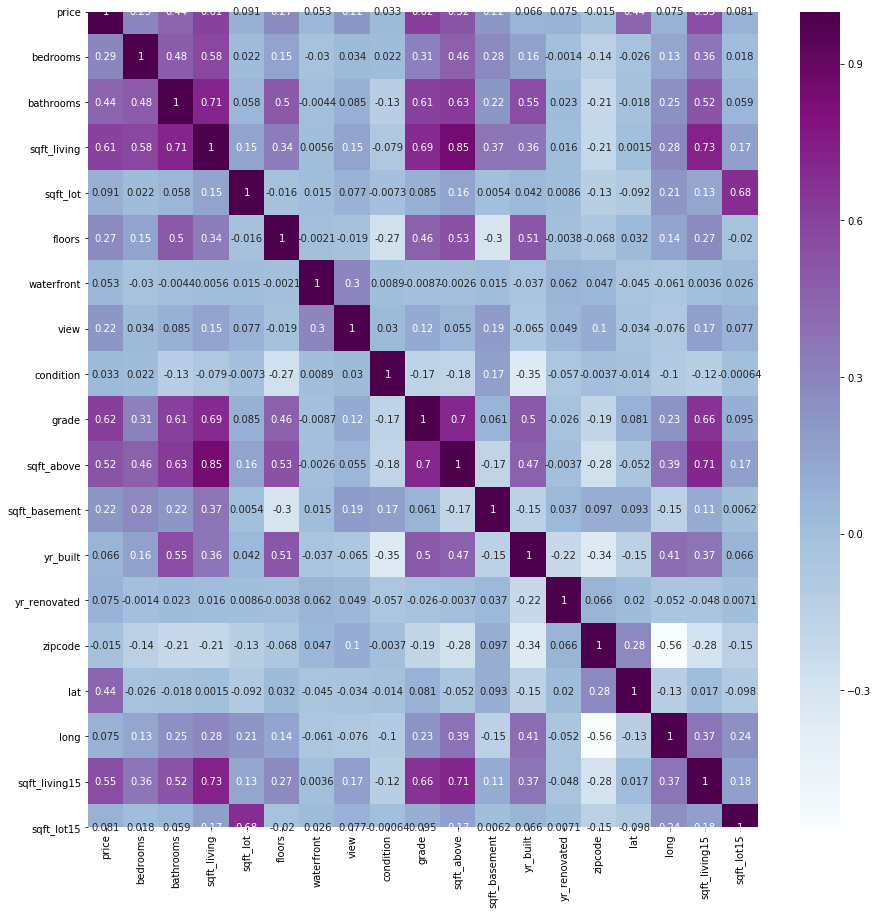

In [19]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,cmap="BuPu",annot=True)

In [20]:
corr[abs(corr > 0.70)] #easier to pick out highly correlated
#sqft living and sqft above highly correlated?
#swfit living and bedroom/bath highly correlated?

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.000000,0.713214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,0.713214,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.849375,NaN,NaN,NaN,NaN,NaN,NaN,0.728488,NaN
sqft_lot,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.702092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.corr()['price'].sort_values()

zipcode         -0.014642
condition        0.033298
waterfront       0.052764
yr_built         0.065824
long             0.074778
yr_renovated     0.075452
sqft_lot15       0.080660
sqft_lot         0.090758
view             0.216607
sqft_basement    0.218675
floors           0.273637
bedrooms         0.290422
lat              0.439919
bathrooms        0.443596
sqft_above       0.520383
sqft_living15    0.551840
sqft_living      0.607769
grade            0.621512
price            1.000000
Name: price, dtype: float64

In [22]:
df['yr_renovated'].value_counts()
#possibly break out to 0 and 1

0       15534
2014       63
2000       27
2007       26
2013       25
2005       22
2003       18
1990       17
1989       16
2004       16
2006       14
1987       14
1985       13
1986       13
1995       12
1998       12
2009       12
1991       12
1996       12
2002       11
2001       11
1993       11
1988       11
2015       11
1994       10
2008       10
1983       10
1999       10
1984        9
2010        8
2011        8
1997        8
2012        8
1970        7
1980        7
1982        7
1992        7
1979        6
1977        6
1975        5
1968        5
1978        5
1964        4
1973        4
1953        3
1945        3
1976        3
1965        3
1955        3
1963        3
1981        3
1974        2
1972        2
1962        2
1946        2
1967        2
1971        2
1969        2
1957        2
1958        2
1950        2
1940        2
1960        2
1944        1
1951        1
1956        1
1934        1
1959        1
1948        1
Name: yr_renovated, dtype: int64

In [23]:
test1 = ols(formula = 'price~bedrooms+bathrooms+yr_built+waterfront+grade+sqft_living',data=df).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     3137.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        11:22:08   Log-Likelihood:            -2.1322e+05
No. Observations:               16128   AIC:                         4.265e+05
Df Residuals:                   16121   BIC:                         4.265e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.477e+06   8.64e+04     51.785      0.000    4.31e+06    4.65e+06
bedrooms    -1.341e+04   1443.350     -9.294      0.000   -1.62e+04   -1.06e+04
bathrooms    3.732e+04   2426.879     15.380      0.000    3.26e+04    4.21e+04
yr_built    -2520.7959     45.813    -55.023      0.000   -2610.595   -2430.997
waterfront   1.467e+05   1.95e+04      7.508      0.000    1.08e+05    1.85e+05
grade        1.019e+05   1572.747     64.789      0.000    9.88e+04    1.05e+05
sqft_living    82.8921      2.512     33.003      0.000      77.969      87.815
==============================================================================
Omnibus:                      329.781   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.371
Skew:                           0.306   Prob(JB):                     1.54e-83
Kurtosis:                       3.440   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.isnull().sum() #no nulls

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

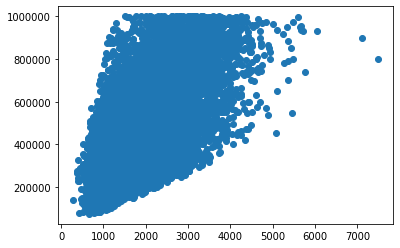

In [25]:
plt.scatter(df['sqft_living'],df['price'])

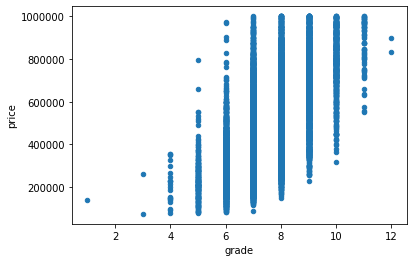

In [26]:
df.plot.scatter(x='grade',y='price')
#ok numbers represent order 


In [27]:
#df['date'] = df['date'].astype(str) #drop this?

In [28]:
#df['date'] = pd.to_datetime(df['date'], format='%y%m%d.T000000')

In [10]:
df['yr_old'] =  df['yr_built'].map(lambda x: 2016-x)

In [30]:
df['yr_old'].describe() #shows years old of each house

count    16128.000000
mean        45.481151
std         29.072409
min          1.000000
25%         21.000000
50%         42.000000
75%         65.000000
max        116.000000
Name: yr_old, dtype: float64

In [11]:
df['yr_since_reno'] =  df['yr_renovated'].map(lambda x: 2016-x if x > 0 else 0)

In [32]:
df['yr_since_reno'].value_counts()

0     15534
2        63
16       27
9        26
3        25
11       22
13       18
26       17
27       16
12       16
29       14
10       14
30       13
31       13
18       12
20       12
25       12
21       12
7        12
14       11
28       11
1        11
23       11
15       11
8        10
22       10
33       10
17       10
32        9
19        8
6         8
4         8
5         8
24        7
46        7
36        7
34        7
39        6
37        6
38        5
41        5
48        5
52        4
43        4
40        3
71        3
35        3
61        3
53        3
51        3
63        3
42        2
76        2
47        2
70        2
54        2
45        2
56        2
59        2
58        2
44        2
49        2
66        2
68        1
72        1
57        1
65        1
82        1
60        1
Name: yr_since_reno, dtype: int64

In [33]:
df.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,yr_since_reno
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,30,0
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,39,0
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,12,0
5,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,46,0
6,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087,29,0
7,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400,46,0
8,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288,11,0
9,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600,107,0
10,20150422T000000,638000.0,3,1.00,1830,4400,1.5,0,0,4,8,1720,110,1930,0,98122,47.6052,-122.300,1650,4400,86,0
11,20150303T000000,385000.0,3,1.75,1930,14389,1.0,0,0,3,7,1130,800,1963,1998,98155,47.7733,-122.317,1730,14378,53,18


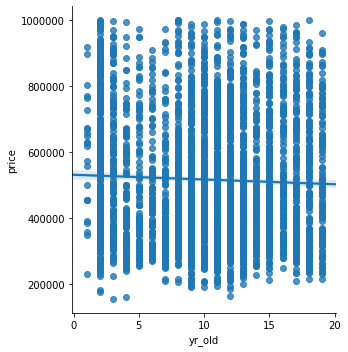

In [34]:
#visualizing price and yr old.... linear? 
sns.lmplot(x='yr_old',y='price',data=df[df['yr_old']<20],fit_reg=True)

In [12]:
features=['bedrooms','bathrooms','sqft_living','grade','yr_old','waterfront','sqft_lot','floors','yr_since_reno']

In [13]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

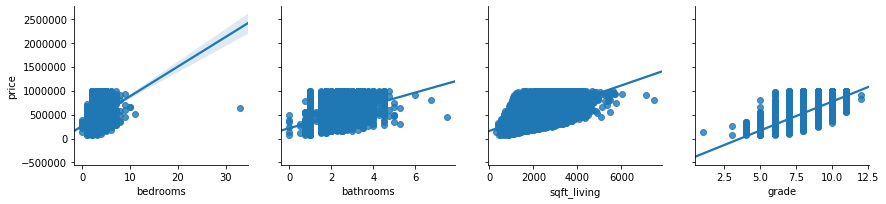

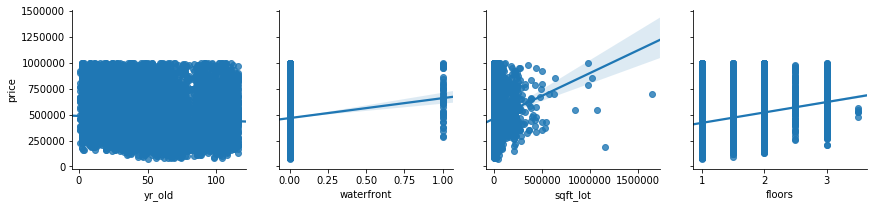

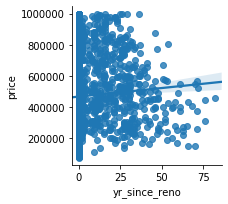

In [37]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [38]:
df['zipcode'].nunique()

70

In [39]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,yr_since_reno
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,30,0
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,39,0
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,12,0
5,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,46,0
6,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087,29,0


In [14]:
df2=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','zipcode','yr_old','yr_since_reno']]

In [41]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,yr_old,yr_since_reno
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,98058,30,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,98115,39,0
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,98052,12,0
5,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,98031,46,0
6,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,98007,29,0


In [15]:
zipcode_dummy = pd.get_dummies(df2['zipcode'],prefix = 'zip', drop_first=True)
df2 = pd.concat([df2, zipcode_dummy], axis = 1)

In [43]:
pd.set_option('display.max_columns', 100)

In [16]:
df2.drop(columns='zipcode',inplace=True)

In [45]:
df2['bedrooms'].value_counts()

3     7629
4     4893
2     2175
5     1039
6      186
1      159
7       23
0       10
8        6
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
df2['bedrooms']=df2['bedrooms'].map(lambda x: x if x < 15 else 15)

In [47]:
df2['bedrooms'].value_counts()

3     7629
4     4893
2     2175
5     1039
6      186
1      159
7       23
0       10
8        6
9        4
10       2
15       1
11       1
Name: bedrooms, dtype: int64

In [18]:
target=df2.price

In [19]:
features_cols=list(df2.columns)

In [20]:
features_cols=features_cols[1:]

In [21]:
len(features_cols)


80

In [22]:
features2=df2[features_cols]

In [107]:
features2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_old,yr_since_reno,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,4,2.25,2070,8893,2.0,0,0,4,8,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,3.00,2900,6730,1.0,0,0,5,8,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2.50,2550,5376,2.0,0,0,3,9,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4,2.00,1710,8288,1.5,0,0,3,7,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4,2.50,2690,8036,2.0,0,0,4,9,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5,2.50,3240,9960,1.0,0,1,3,8,58,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,2,1.75,1300,4000,2.0,0,0,3,7,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,3,1.00,1050,9876,1.0,0,0,3,7,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,3,1.50,1900,43186,1.5,0,0,4,7,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
polynomial_features_2= PolynomialFeatures(degree=2)
x_poly = polynomial_features_2.fit_transform(features2)

In [53]:
corr2=df2.corr()

In [54]:
corr2[abs(corr2 > 0.70)]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_old,yr_since_reno,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.000000,0.713214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,0.713214,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [55]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_old,yr_since_reno,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
price,1.000000,0.297578,0.443596,0.607769,0.090758,0.273637,0.052764,0.216607,0.033298,0.621512,-0.065824,0.028129,-0.118944,-0.107061,0.133375,0.115710,0.144241,0.048653,0.054877,-0.014917,0.009728,-0.019009,-0.019207,-0.088257,-0.150017,0.007908,0.069112,-0.006487,0.076276,-0.098118,-0.099041,-0.088299,0.108175,-0.000829,-0.090957,0.042482,0.152254,-0.132681,-0.028427,0.134386,0.106699,-0.094212,-0.045187,-0.094216,-0.015674,0.022466,0.003838,0.037917,0.126253,0.159928,0.077044,-0.087739,0.065929,0.085649,0.078576,-0.098628,0.050217,-0.055389,0.061876,0.096492,0.088457,0.063036,0.068432,-0.060765,0.092011,0.065782,-0.012069,-0.028961,-0.066265,0.034433,0.019437,-0.078143,-0.051557,-0.053606,-0.022160,-0.134266,0.047702,-0.097471,-0.075141,-0.102379,0.106477
bedrooms,0.297578,1.000000,0.495910,0.597323,0.023003,0.154170,-0.030983,0.035233,0.019759,0.323025,-0.164642,-0.023336,-0.001752,0.007086,0.005840,0.043784,0.060501,0.041496,0.053734,0.000210,0.029109,-0.030759,0.006145,-0.024311,0.015353,-0.004556,0.027477,0.018405,0.010770,0.022706,0.023473,0.000765,0.017281,0.028940,0.021259,-0.003338,0.044943,0.011695,-0.015042,0.057181,-0.026654,-0.008264,0.017497,0.034047,0.057970,0.021412,-0.047649,0.008307,0.045038,0.072823,0.029747,0.023635,-0.011121,-0.059238,0.005888,-0.035095,-0.049573,-0.016221,-0.022673,-0.026922,-0.029230,-0.039260,-0.064151,-0.046496,-0.026475,-0.023552,-0.016391,-0.071519,-0.028780,-0.049413,-0.013672,-0.024125,-0.009170,-0.001884,0.010446,-0.045376,-0.006081,0.000916,0.006721,-0.018054,-0.031729
bathrooms,0.443596,0.495910,1.000000,0.713214,0.058197,0.498996,-0.004443,0.085075,-0.134723,0.605792,-0.549594,-0.021530,-0.029381,0.005129,-0.016952,0.035381,0.057620,0.005621,-0.000552,0.004622,0.032985,-0.008597,0.036593,-0.019985,0.007344,0.000866,0.072308,0.016561,0.086222,0.018588,0.020469,-0.040667,0.010424,0.003499,0.080603,-0.016994,0.024059,0.017941,0.003185,0.074034,0.061247,-0.010435,0.001133,0.008392,0.049199,0.079301,-0.015437,0.022900,0.084638,0.103176,0.041264,0.042258,0.006028,-0.035781,-0.016869,-0.042875,-0.005140,-0.014428,-0.012739,-0.021467,-0.056561,-0.023678,-0.063936,-0.075704,-0.005725,-0.003510,-0.042917,-0.065101,-0.067632,-0.028901,-0.012569,-0.074429,-0.022763,-0.055639,-0.023337,-0.100154,-0.012192,-0.049232,-0.018535,-0.046332,-0.009890
sqft_living,0.607769,0.597323,0.713214,1.000000,0.149980,0.340827,0.005603,0.153489,-0.078797,0.694363,-0.360597,-0.004512,-0.044555,-0.002828,0.000918,0.062467,0.088835,0.010261,0.006766,0.018785,0.037202,0.002889,0.031309,-0.020494,0.006068,0.013742,0.075220,0.023547,0.043163,0.002265,-0.000813,-0.026838,0.014906,-0.014125,0.042289,-0.010963,0.049820,0.000508,0.000363,0.083521,0.082219,-0.023385,0.011509,0.011658,0.062114,0.083323,-0.007935,0.043640,0.110891,0.152553,0.092062,0.046626,-0.015526,-0.077562,-0.023347,-0.080440,-0.061464,-0.032350,-0.023351,-0.017784,-0.048509,-0.037474,-0.076507,-0.070664,-0.025081,-0.040694,-0.037136,-0.070469,-0.070944,-0.041852,-0.032288,-0.055442,-0.025156,-0.043620,0.008669,-0.074632,0.012502,-0.035015,-0.018392,-0.036546,-0.010537
sqft_lot,0.090758,0.023003,0.058197,0.149980,1.000000,-0.016122,0.014834,0.076964,-0.007303,0.0851

In [24]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features2, target, random_state=22,test_size=0.2)


In [57]:
#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

-392401.87341193017
[-3.84358306e+03  8.78519160e+03  1.04234951e+02  2.79598575e-01
  2.40995903e+03  1.39104931e+05  2.68779261e+04  1.91614086e+04
  5.14669174e+04  6.01579270e+02  1.20755292e+02 -3.92571782e+02
 -1.08710908e+04  4.92005985e+05  3.20037423e+05  2.69131718e+05
  2.42235474e+05  2.37613747e+05  9.31378934e+04  1.53528830e+05
  1.04563217e+05  1.02890741e+05  3.73330486e+03 -1.89308439e+04
  1.63204912e+05  1.90209232e+05  1.35017876e+05  2.32167389e+05
  5.05849824e+03  8.52020290e+03 -1.09358271e+04  3.00131726e+05
  1.80257479e+05  4.57758505e+04  6.57654339e+05  4.04876250e+05
  1.69809137e+04  1.07550488e+05  2.56949373e+05  2.57705631e+05
  3.60736536e+04  1.02898581e+05  4.21704569e+04  1.07386608e+05
  1.47231870e+05  1.14846669e+05  1.76339384e+05  2.32255400e+05
  2.56359681e+05  1.90673367e+05 -8.21362347e+03  3.61196402e+05
  2.94043089e+05  3.44329769e+05  9.86156960e+04  2.88582110e+05
  9.46121450e+04  3.60260140e+05  3.81981795e+05  2.87298397e+05
  2.7

In [58]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.8199706966421144


In [59]:
y_train_pred = lm.predict(X_train)

In [60]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 61595.41135626469
Mean Squared Error: 6942313757.511776
Root Mean Squared Error: 83320.54823098426


In [61]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.3134081533658042
Root Mean Squared Error: 0.42394942388583123


In [62]:
y_pred = lm.predict(X_test)

In [63]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.8285113166689444


Text(0, 0.5, 'Predictions')

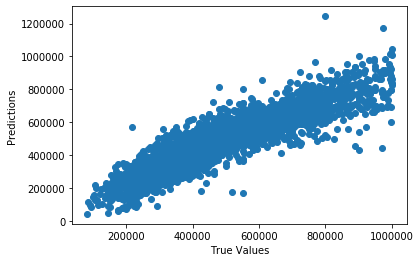

In [64]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

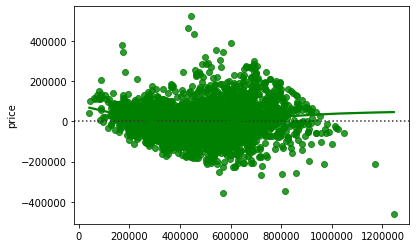

In [65]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [66]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:60036.858274777485
Mean Squared Error:6662674426.942443
Root Mean Squared Error:81625.20705604638


In [67]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3054779645345901
Root Mean Squared Error Z: 0.4153232334722452


In [68]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  83320 vs. Testing:  81625


In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled =pd.DataFrame(data=scaler.transform(X_train), columns=features_cols)
X_test_scaled =pd.DataFrame(data=scaler.transform(X_test), columns=features_cols)

In [70]:
#saving scaler

dump(scaler,open('scaler.pkl','wb'))

In [71]:
X_train_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_old,yr_since_reno,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0.748320,0.297626,0.410520,-0.123417,-0.873621,-0.053629,-0.264139,-0.625611,-0.497937,-0.185945,-0.152266,-0.10128,-0.121273,-0.078989,-0.087935,-0.136795,-0.085669,-0.113117,-0.069489,-0.097704,-0.080952,-0.096893,-0.111702,6.124821,-0.059817,-0.141142,-0.117262,-0.11995,-0.111346,-0.114861,-0.077989,-0.132620,-0.164268,-0.167475,-0.01969,-0.085209,-0.16352,-0.103215,-0.168451,-0.137967,-0.115896,-0.14785,-0.151905,-0.149755,-0.125481,-0.075434,-0.11658,-0.144252,-0.12675,-0.098108,-0.136501,-0.061744,-0.168936,-0.087486,-0.132317,-0.114166,-0.09851,-0.064225,-0.087035,-0.165013,-0.122582,-0.162267,-0.158196,-0.086582,-0.119283,-0.139995,-0.131099,-0.159988,-0.112412,-0.121273,-0.121273,-0.051402,-0.146476,-0.106984,-0.119617,-0.114514,-0.116922,-0.081917,-0.118276,-0.119617
1,-0.363603,-0.411379,-0.315658,-0.230091,-0.873621,-0.053629,-0.264139,0.920678,0.490886,0.951361,-0.152266,-0.10128,-0.121273,-0.078989,-0.087935,-0.136795,-0.085669,-0.113117,-0.069489,-0.097704,-0.080952,-0.096893,-0.111702,-0.163270,-0.059817,-0.141142,-0.117262,-0.11995,-0.111346,-0.114861,-0.077989,-0.132620,-0.164268,-0.167475,-0.01969,-0.085209,-0.16352,-0.103215,-0.168451,-0.137967,-0.115896,-0.14785,-0.151905,-0.149755,-0.125481,-0.075434,-0.11658,-0.144252,-0.12675,-0.098108,-0.136501,-0.061744,-0.168936,-0.087486,-0.132317,-0.114166,-0.09851,-0.064225,-0.087035,-0.165013,-0.122582,-0.162267,-0.158196,-0.086582,-0.119283,-0.139995,-0.131099,-0.159988,-0.112412,-0.121273,-0.121273,-0.051402,-0.146476,-0.106984,-0.119617,-0.114514,-0.116922,-0.081917,-0.118276,8.360030
2,-0.363603,0.652129,0.080439,-0.174976,0.995764,-0.053629,-0.264139,0.920678,0.490886,-0.358264,-0.152266,-0.10128,-0.121273,-0.078989,-0.087935,-0.136795,-0.085669,-0.113117,-0.069489,-0.097704,-0.080952,-0.096893,-0.111702,-0.163270,-0.059817,-0.141142,-0.117262,-0.11995,-0.111346,-0.114861,-0.077989,7.540325,-0.164268,-0.167475,-0.01969,-0.085209,-0.16352,-0.103215,-0.168451,-0.137967,-0.115896,-0.14785,-0.151905,-0.149755,-0.125481,-0.075434,-0.11658,-0.144252,-0.12675,-0.098108,-0.136501,-0.061744,-0.168936,-0.087486,-0.132317,-0.114166,-0.09851,-0.064225,-0.087035,-0.165013,-0.122582,-0.162267,-0.158196,-0.086582,-0.119283,-0.139995,-0.131099,-0.159988,-0.112412,-0.121273,-0.121273,-0.051402,-0.146476,-0.106984,-0.119617,-0.114514,-0.116922,-0.081917,-0.118276,-0.119617
3,-0.363603,-1.474888,-1.015428,0.311552,-0.873621,-0.053629,-0.264139,2.466967,-0.497937,0.951361,5.224562,-0.10128,-0.121273,-0.078989,-0.087935,-0.136795,-0.085669,-0.113117,-0.069489,-0.097704,-0.080952,-0.096893,-0.111702,-0.163270,-0.059817,-0.141142,-0.117262,-0.11995,-0.111346,-0.114861,-0.077989,-0.132620,-0.164268,-0.167475,-0.01969,-0.085209,-0.16352,-0.103215,-0.168451,-0.137967,-0.115896,-0.14785,-0.151905,6.677582,-0.125481,-0.075434,-0.11658,-0.144252,-0.12675,-0.098108,-0.136501,-0.061744,-0.168936,-0.087486,-0.132317,-0.114166,-0.09851,-0.064225,-0.087035,-0.165013,-0.122582,-0.162267,-0.158196,-0.086582,-0.119283,-0.139995,-0.131099,-0.159988,-0.112412,-0.121273,-0.121273,-0.051402,-0.146476,-0.106984,-0.119617,-0.114514,-0.116922,-0.081917,-0.118276,-0.119617
4,-0.363603,-0.056877,-0.896599,-0.187767,-0.873621,

In [36]:
#instantiate a linear regression object
lm2 = LinearRegression()

#fit the linear regression to the data
lm2 = lm2.fit(X_train_scaled, y_train)

y_train_pred_scaled = lm2.predict(X_train_scaled)



train_rmse_scaled = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_scaled))

train_mae_scaled = metrics.mean_absolute_error(y_train, y_train_pred_scaled)
train_mse_scaled= metrics.mean_squared_error(y_train, y_train_pred_scaled)
train_rmse_scaled = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_scaled))

print('Mean Absolute Error:', train_mae_scaled )
print('Mean Squared Error:',  train_mse_scaled )
print('Root Mean Squared Error:' , train_rmse_scaled)

Mean Absolute Error: 61595.41135622479
Mean Squared Error: 6942313757.511776
Root Mean Squared Error: 83320.54823098426


In [37]:
y_predz=lm2.predict(X_test_scaled)

In [38]:
test_rmse_scaled50 = np.sqrt(metrics.mean_squared_error(y_test, y_predz))

In [39]:
test_rmse_scaled50

81625.20705595602

In [73]:
#save the model
dump(lm2,open('lm2.pkl','wb'))

In [74]:
print(lm2.coef_)

[-3.45670023e+03  6.19543183e+03  7.89465842e+04  1.13229427e+04
  1.28917182e+03  7.43860065e+03  1.68306571e+04  1.23918695e+04
  5.20486973e+04  1.74553951e+04  6.06378504e+02 -3.93559266e+01
 -1.29925702e+03  3.86221306e+04  2.79265442e+04  3.61397060e+04
  2.06008572e+04  2.65384770e+04  6.44091740e+03  1.48586121e+04
  8.40952906e+03  9.87664140e+03  4.11880112e+02 -3.01058677e+03
  9.72765223e+03  2.63220729e+04  1.56176714e+04  2.74534044e+04
  5.56347307e+02  9.65895101e+02 -8.47722386e+02  3.91155824e+04
  2.88325322e+04  7.45714486e+03  1.29440447e+04  3.42502978e+04
  2.70440782e+03  1.09837900e+04  4.20889571e+04  3.48906770e+04
  4.12536526e+03  1.48881172e+04  6.26141553e+03  1.57289153e+04
  1.81884563e+04  8.61428425e+03  2.02820793e+04  3.28203353e+04
  3.19797769e+04  1.85282324e+04 -1.10066079e+03  2.22170643e+04
  4.82962571e+04  2.98953336e+04  1.28240476e+04  3.25224261e+04
  9.23064684e+03  2.30426156e+04  3.29959994e+04  4.61513106e+04
  3.29511088e+04  4.47614

In [75]:
len(X_train_scaled.columns)



80

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
#VIF selection method -> no features appear to be too highly correlated with eachother
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif["features"] = X_train_scaled.columns
vif.round(1)

,VIF Factor,features
0,1.7,bedrooms
1,2.9,bathrooms
2,3.7,sqft_living
3,1.2,sqft_lot
4,1.9,floors
5,1.2,waterfront
6,1.2,view
7,1.3,condition
8,2.8,grade
9,3.0,yr_old


In [78]:
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()

In [79]:
#recursive wrapper method

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train_scaled, y_train)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [80]:
selected_columns = X_train_scaled.columns[selector.support_]
removed_columns = X_train_scaled.columns[~selector.support_]

In [81]:
list(removed_columns)

['floors',
 'yr_since_reno',
 'zip_98002',
 'zip_98003',
 'zip_98022',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98092']

In [82]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_old',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199']

In [83]:
len(X_train_scaled.columns)

80

In [84]:
lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(X_train_scaled[selected_columns], y_train)

y_rfe=lm_rfe.predict(X_train_scaled[selected_columns])

trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))

print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test_scaled[selected_columns])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print("Train RMSE", int(trainRFE_rmse), "Test RMSE: ", int(testRFE_rmse))

Training Root Mean Squared Error: 83358.22231345238
Testing Root Mean Squared Error: 81655.27094981128
Train RMSE 83358 Test RMSE:  81655


In [85]:
#Root Mean Squared Error: 82832.19193504081

In [86]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)

train_rmse_lasso = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse_lasso) )
print('Testing Error: '+ str(test_rmse_lasso) )



Training Error: 61595.39395341121
Testing Error: 81625.22733093888


In [87]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train_scaled.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
#lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))
lasso_coef01.T

,0
zip_98023,-18963.788135
zip_98032,-10967.625134
zip_98003,-10903.827943
zip_98092,-8246.404472
bedrooms,-3843.791640
zip_98002,-424.910598
sqft_lot,0.279598
sqft_living,104.234715
yr_since_reno,120.732636
yr_old,601.608366


In [88]:
X_train_scaled2=X_train_scaled.drop(columns='sqft_lot')

In [89]:
len(X_train_scaled2.columns)

79

In [90]:
X_test_scaled2=X_test_scaled.drop(columns='sqft_lot')

In [91]:
#instantiate a linear regression object
lm3 = linear_model.LinearRegression()

#fit the linear regression to the data
lm3 = lm3.fit(X_train_scaled2, y_train)

y_train_pred_scaled2 = lm3.predict(X_train_scaled2)



train_rmse_scaled2 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_scaled2))

train_mae_scaled2 = metrics.mean_absolute_error(y_train, y_train_pred_scaled2)
train_mse_scaled2= metrics.mean_squared_error(y_train, y_train_pred_scaled2)
train_rmse_scaled2 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_scaled2))

print('Mean Absolute Error:', train_mae_scaled2 )
print('Mean Squared Error:',  train_mse_scaled2 )
print('Root Mean Squared Error:' , train_rmse_scaled2)


print(lm3.intercept_)
print(lm3.coef_)

Mean Absolute Error: 62086.8647085478
Mean Squared Error: 7049794842.4300165
Root Mean Squared Error: 83963.0564142946
467161.62122151605
[-4215.97214147  5889.91136508 80986.36836921   771.2648901
  7055.90496396 17429.2523218  12228.93561352 52410.37692857
 18440.24850451   608.89205544  -233.25986329 -1518.81132826
 38449.66915735 27756.73304872 35777.07814347 20412.2748143
 26246.50000348  7020.16443706 14682.72385194  9815.74624565
 10362.24527893  1919.01973891 -3296.7567149  10871.82401121
 26977.35206221 15386.0778698  27171.51303336   505.60865284
   897.54486342  -977.43111319 38801.4766855  28485.67813047
  7953.45962206 12905.07883346 33988.14385485  2824.04117891
 11835.70774043 41724.69692778 35272.50974677  3895.31800281
 14585.57843947  6236.39776061 15634.36955044 18069.89664685
 10182.18850054 20532.42554332 32512.44246833 31818.964825
 19446.72829797  -360.96667087 21974.32000123 47688.88857293
 29533.80991618 12491.47597469 32125.73364777  8894.07906758
 22734.08860

In [92]:
#Original train Root Mean Squared Error: 82832.19193504081

In [93]:
y_pred_scaled2_test = lm3.predict(X_test_scaled2)

test_rmse_scaled2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_scaled2_test))

print('Testing Root Mean Squared Error:' , test_rmse_scaled2)

Testing Root Mean Squared Error: 82647.90730077888


In [94]:
#original test RMSE 83570

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
#polynomial transformation of features - degree 2
did this above

#polynomial_features= PolynomialFeatures(degree=2)
#x_poly = polynomial_features.fit_transform(X_train_scaled)

In [27]:
poly_model = LinearRegression()
poly_model.fit(X_train_scaled, y_train)
y_poly_pred = poly_model.predict(X_train_scaled)

In [30]:
rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)
print(rmse)
print(r2)

83320.54823098426
0.8199706966421144


Text(0, 0.5, 'Predictions')

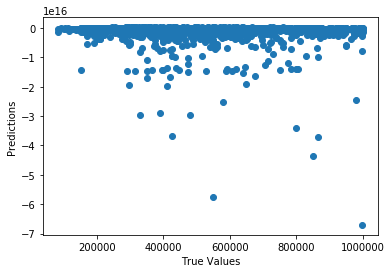

In [105]:
## The line / model #scatter of poly test model 
plt.scatter(y_test, y_poly_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
#polynomial_features3= PolynomialFeatures(degree=3)
#x_poly3 = polynomial_features3.fit_transform(X_train_scaled)


In [ ]:
#poly_model3 = LinearRegression()
#poly_model3.fit(x_poly3, y_train)
#y_poly_pred3 = poly_model3.predict(x_poly3)

In [ ]:
#rmse3 = np.sqrt(mean_squared_error(y_train,y_poly_pred3))
#r23 = r2_score(y_train,y_poly_pred3)
#print(rmse3)
#print(r23)


In [100]:
#overfitting? #transform before split, or do fit_transform
#x_poly_test=polynomial_features.fit_transform(X_test) already did this on all data

In [31]:
y_poly_pred_test=poly_model.predict(X_test_scaled)

In [32]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_poly_pred_test))
r2_test = r2_score(y_test, y_poly_pred_test)
  

In [33]:
print(rmse_test)

81625.20705595602


In [34]:
print(r2_test)

0.828511316669324


In [ ]:
y_pred_test_poly = poly_model.predict(x_poly_test)

test_rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_poly))

print('Testing Root Mean Squared Error:' , test_rmse_poly)